In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os 
import numpy as np

In [2]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/point_runs_timing/timing_results'
fluxes_50 = os.path.join(direc, 'fluxes_50nodes_pointrun.1948-09-01.nc')
fluxes_10 = os.path.join(direc, 'fluxes_10nodes_pointrun.1948-09-01.nc')
'''timing_50 = os.path.join('/Users/diana/Dropbox/UW/Research/rasm/point_runs_timing/timing_results',
                         'timing_vicrun.1948.nc')'''
timing_10 = os.path.join(direc, 'timing_pointrun_10nodes.1948-09-01-00000.nc')
timing_50 = os.path.join(direc, 'timing_pointrun_50nodes.1948-09-01-00000.nc')
tnode_50 = os.path.join(direc, 'fluxes_50nodes_tnode.1948.nc')
tnode_10 = os.path.join(direc, 'fluxes_10nodes_tnode.1948.nc')
tnode_fallback50 = os.path.join(direc, 'timing_50nodes_SUMonly_soilt_fbflag.nc')
tnode_fallback10 = os.path.join(direc, 'timing_10nodes_SUMonly_soilt_fbflag.nc')
statefile50 = os.path.join(direc, 'statefile_50nodes.nc')
statefile10 = os.path.join(direc, 'statefile_10nodes.nc')

In [3]:
fluxes50 = xr.open_dataset(fluxes_50)
fluxes10 = xr.open_dataset(fluxes_10)
domain = xr.open_dataset(os.path.join('/Users/diana/Dropbox/UW/Research/rasm/point_runs_timing', 
                         'domain.lnd.20171023.nc'))
timing50 = xr.open_dataset(timing_50)
timing10 = xr.open_dataset(timing_10)
tnode50 = xr.open_dataset(tnode_50)
tnode10 = xr.open_dataset(tnode_10)
tnode_fback50 = xr.open_dataset(tnode_fallback50)
tnode_fback10 = xr.open_dataset(tnode_fallback10)
nodedepths50 = xr.open_dataset(statefile50)
nodedepths10 = xr.open_dataset(statefile10)

In [12]:
node_depths_50nodes = nodedepths50.node_depth.where(domain.mask == 1, drop=True).values.flatten()
node_depths_10nodes = nodedepths10.node_depth.where(domain.mask == 1, drop=True).values.flatten()

In [73]:
runtime_50 = (timing50.OUT_TIME_VICRUN_WALL.where(domain.mask ==1, drop=True)/np.timedelta64(1,'s'))
runtime_10 = (timing10.OUT_TIME_VICRUN_WALL.where(domain.mask ==1, drop=True)/np.timedelta64(1,'s'))

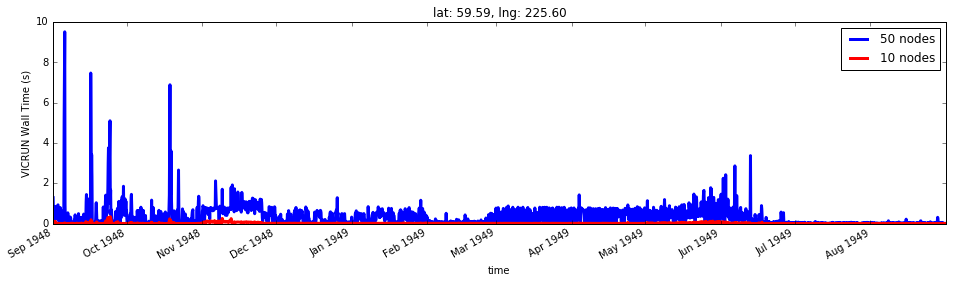

In [110]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
runtime_50.plot(ax=axes, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
runtime_10.plot(ax=axes, **kwargs)
axes.set_ylabel('VICRUN Wall Time (s)')
plt.title("lat: 59.59, lng: 225.60")
plt.legend(loc='upper right')

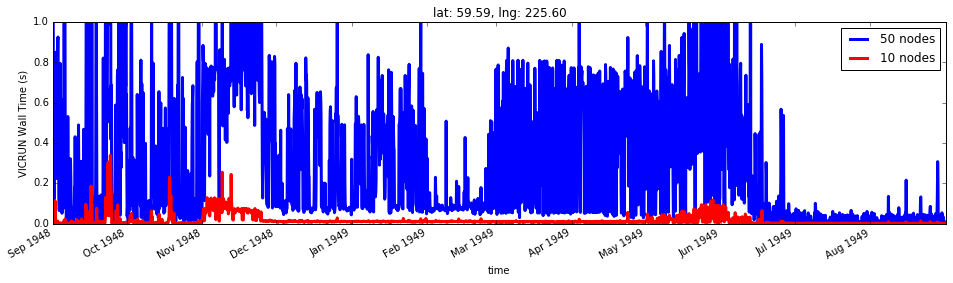

In [111]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
runtime_50.plot(ax=axes, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
runtime_10.plot(ax=axes, **kwargs)
axes.set_ylabel('VICRUN Wall Time (s)')
plt.title("lat: 59.59, lng: 225.60")
plt.ylim([0,1])
plt.legend(loc='upper right')

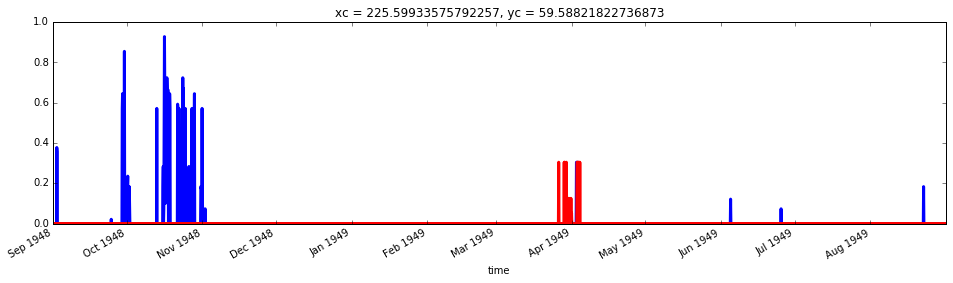

In [97]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fback_50 = tnode_fback50.summ.where(domain.mask ==1, drop=True).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fback_10 = tnode_fback10.summ.where(domain.mask ==1, drop=True).plot(**kwargs)

(0, 1)

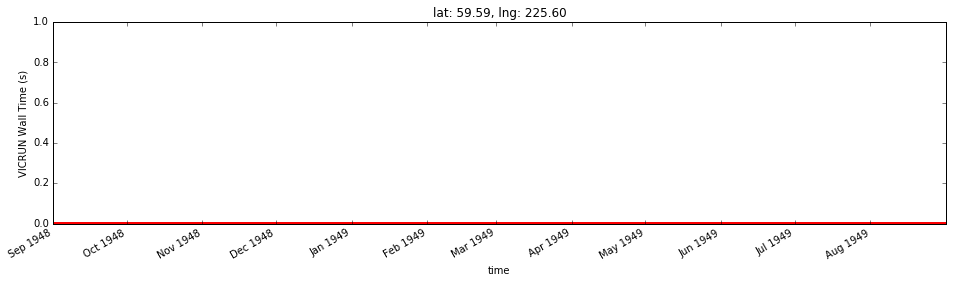

In [81]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
timing50.OUT_SURFT_FBFLAG.where(domain.mask == 1, drop=True).plot(ax=axes, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
timing10.OUT_SURFT_FBFLAG.where(domain.mask == 1, drop=True).plot(ax=axes, **kwargs)
axes.set_ylabel('surface temperature fallback flag')
plt.title("lat: 59.59, lng: 225.60")
plt.ylim([0,1])

(0, 1)

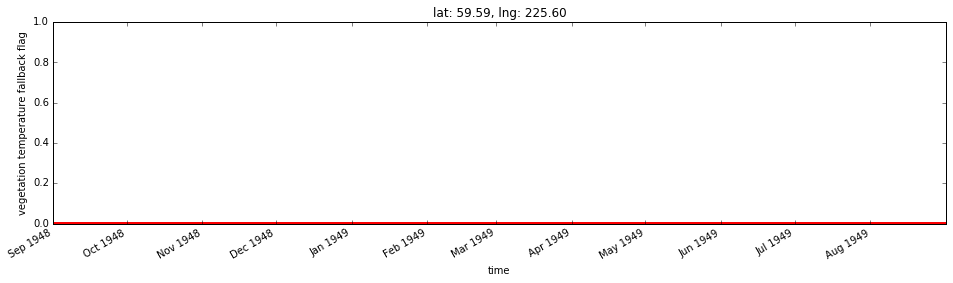

In [84]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
timing50.OUT_TFOL_FBFLAG.where(domain.mask == 1, drop=True).plot(ax=axes, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
timing10.OUT_TFOL_FBFLAG.where(domain.mask == 1, drop=True).plot(ax=axes, **kwargs)
axes.set_ylabel('vegetation temperature fallback flag')
plt.title("lat: 59.59, lng: 225.60")
plt.ylim([0,1])

(0, 1)

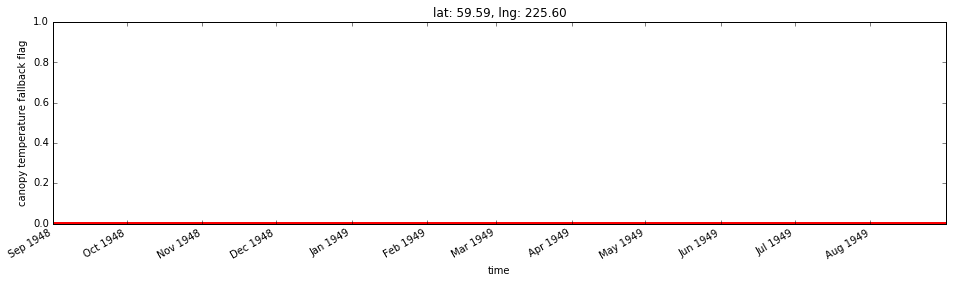

In [82]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
timing50.OUT_TCAN_FBFLAG.where(domain.mask == 1, drop=True).plot(ax=axes, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
timing10.OUT_TCAN_FBFLAG.where(domain.mask == 1, drop=True).plot(ax=axes, **kwargs)
axes.set_ylabel('canopy temperature fallback flag')
plt.title("lat: 59.59, lng: 225.60")
plt.ylim([0,1])

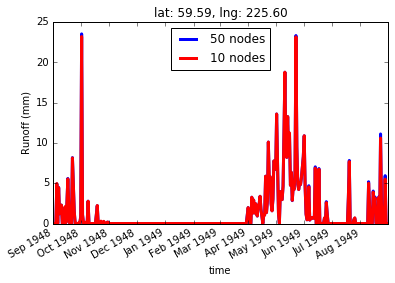

In [118]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_RUNOFF.where(domain.mask == 1, drop=True).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_RUNOFF.where(domain.mask == 1, drop=True).plot(**kwargs)
plt.legend(loc='upper center')
plt.title("lat: 59.59, lng: 225.60")
plt.ylabel('Runoff (mm)')

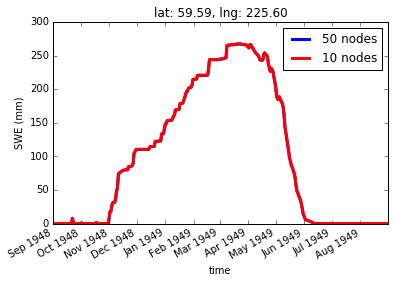

In [112]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SWE.where(domain.mask == 1, drop=True).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_SWE.where(domain.mask == 1, drop=True).plot(**kwargs)
plt.legend(loc='upper right')
plt.title("lat: 59.59, lng: 225.60")
plt.ylabel('SWE (mm)')

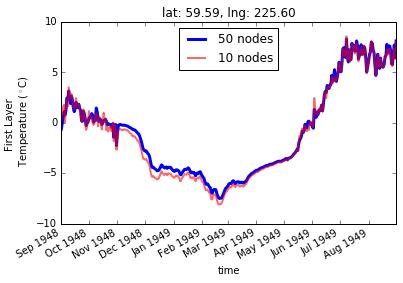

In [49]:
lw = 3.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SOIL_TEMP.where(domain.mask == 1, drop=True).isel(nlayer=0).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': 2.0, 'color': 'red', 'linestyle': '-', 'alpha': 0.6}
fluxes10.OUT_SOIL_TEMP.where(domain.mask == 1, drop=True).isel(nlayer=0).plot(**kwargs)
plt.ylabel('First Layer \n Temperature ($^\circ$C)')
plt.legend(loc='upper center')
plt.title("lat: 59.59, lng: 225.60")

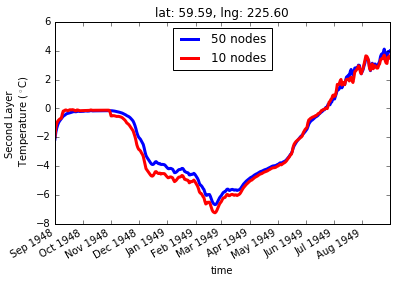

In [59]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SOIL_TEMP.where(domain.mask == 1, drop=True).isel(nlayer=1).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_SOIL_TEMP.where(domain.mask == 1, drop=True).isel(nlayer=1).plot(**kwargs)
plt.ylabel('Second Layer \n Temperature ($^\circ$C)')
plt.legend(loc='upper center')
plt.title("lat: 59.59, lng: 225.60")

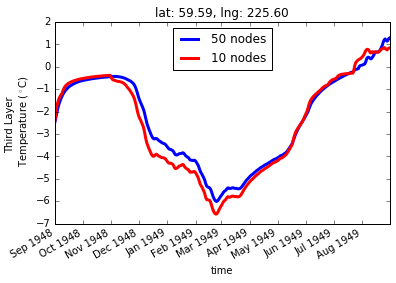

In [60]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SOIL_TEMP.where(domain.mask == 1, drop=True).isel(nlayer=2).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_SOIL_TEMP.where(domain.mask == 1, drop=True).isel(nlayer=2).plot(**kwargs)
plt.ylabel('Third Layer \n Temperature ($^\circ$C)')
plt.legend(loc='upper center')
plt.title("lat: 59.59, lng: 225.60")

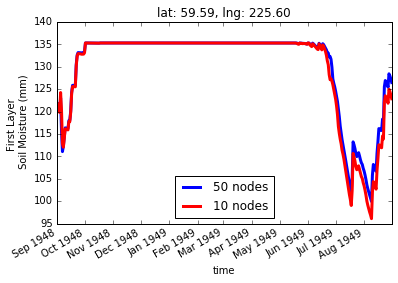

In [62]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SOIL_MOIST.where(domain.mask == 1, drop=True).isel(nlayer=0).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_SOIL_MOIST.where(domain.mask == 1, drop=True).isel(nlayer=0).plot(**kwargs)
plt.ylabel('First Layer \n Soil Moisture (mm)')
plt.legend(loc='lower center')
plt.title("lat: 59.59, lng: 225.60")

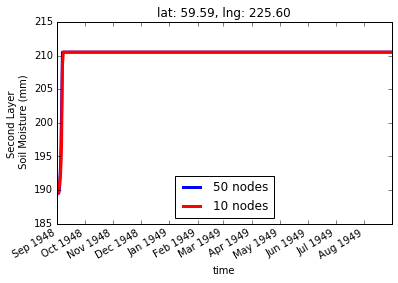

In [64]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SOIL_MOIST.where(domain.mask == 1, drop=True).isel(nlayer=1).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_SOIL_MOIST.where(domain.mask == 1, drop=True).isel(nlayer=1).plot(**kwargs)
plt.ylabel('Second Layer \n Soil Moisture (mm)')
plt.legend(loc='lower center')
plt.title("lat: 59.59, lng: 225.60")

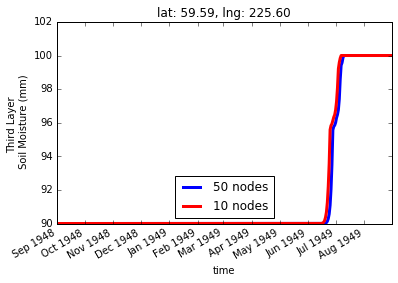

In [65]:
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
fluxes50.OUT_SOIL_MOIST.where(domain.mask == 1, drop=True).isel(nlayer=2).plot(**kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
fluxes10.OUT_SOIL_MOIST.where(domain.mask == 1, drop=True).isel(nlayer=2).plot(**kwargs)
plt.ylabel('Third Layer \n Soil Moisture (mm)')
plt.legend(loc='lower center')
plt.title("lat: 59.59, lng: 225.60")

In [31]:
tnode50.OUT_SOIL_TNODE.sel(time='1948-09-15')

<xarray.DataArray 'OUT_SOIL_TNODE' (node: 50, nj: 205, ni: 275)>
[2818750 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 1948-09-15
Dimensions without coordinates: node, nj, ni
Attributes:
    long_name:      soil_tnode
    standard_name:  soil_temperature
    units:          C
    description:    soil temperature for each soil thermal node
    cell_methods:   time: mean

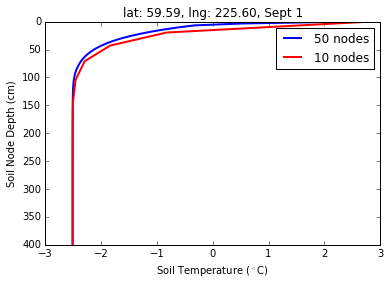

In [32]:
temps_50 = tnode50.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1948-09-01').values
temps_10 = tnode10.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1948-09-01').values
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
plt.plot(temps_50.flatten(), node_depths_50nodes*100, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
plt.plot(temps_10.flatten(), node_depths_10nodes*100, **kwargs)
plt.ylim([400, 0])
plt.ylabel('Soil Node Depth (cm)')
plt.xlabel('Soil Temperature ($^\circ$C)')
plt.legend(loc='upper right')
plt.title("lat: 59.59, lng: 225.60, Sept 1")

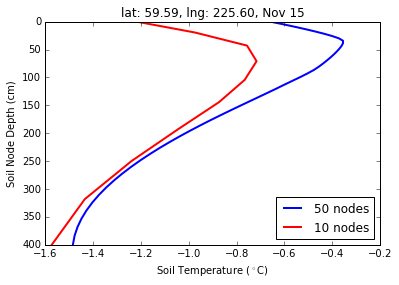

In [39]:
temps_50 = tnode50.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1948-11-15').values
temps_10 = tnode10.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1948-11-15').values
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
plt.plot(temps_50.flatten(), node_depths_50nodes*100, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
plt.plot(temps_10.flatten(), node_depths_10nodes*100, **kwargs)
plt.ylim([400, 0])
plt.ylabel('Soil Node Depth (cm)')
plt.xlabel('Soil Temperature ($^\circ$C)')
plt.legend(loc='lower right')
plt.title("lat: 59.59, lng: 225.60, Nov 15")

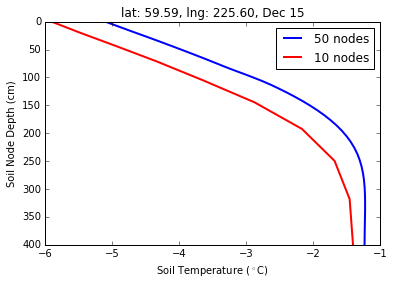

In [33]:
temps_50 = tnode50.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1948-12-15').values
temps_10 = tnode10.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1948-12-15').values
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
plt.plot(temps_50.flatten(), node_depths_50nodes*100, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
plt.plot(temps_10.flatten(), node_depths_10nodes*100, **kwargs)
plt.ylim([400, 0])
plt.ylabel('Soil Node Depth (cm)')
plt.xlabel('Soil Temperature ($^\circ$C)')
plt.legend(loc='upper right')
plt.title("lat: 59.59, lng: 225.60, Dec 15")

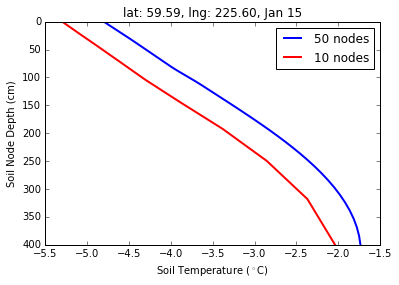

In [35]:
temps_50 = tnode50.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1949-01-15').values
temps_10 = tnode10.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1949-01-15').values
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
plt.plot(temps_50.flatten(), node_depths_50nodes*100, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
plt.plot(temps_10.flatten(), node_depths_10nodes*100, **kwargs)
plt.ylim([400, 0])
plt.ylabel('Soil Node Depth (cm)')
plt.xlabel('Soil Temperature ($^\circ$C)')
plt.legend(loc='upper right')
plt.title("lat: 59.59, lng: 225.60, Jan 15")

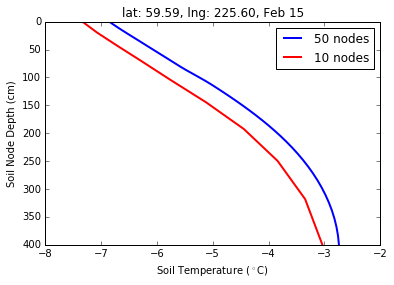

In [36]:
temps_50 = tnode50.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1949-02-15').values
temps_10 = tnode10.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1949-02-15').values
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
plt.plot(temps_50.flatten(), node_depths_50nodes*100, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
plt.plot(temps_10.flatten(), node_depths_10nodes*100, **kwargs)
plt.ylim([400, 0])
plt.ylabel('Soil Node Depth (cm)')
plt.xlabel('Soil Temperature ($^\circ$C)')
plt.legend(loc='upper right')
plt.title("lat: 59.59, lng: 225.60, Feb 15")

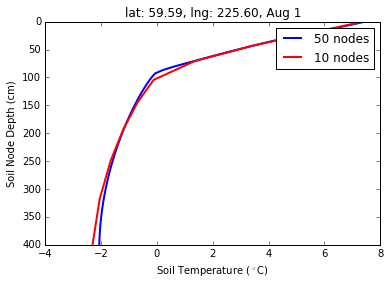

In [37]:
temps_50 = tnode50.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1949-08-01').values
temps_10 = tnode10.OUT_SOIL_TNODE.where(domain.mask == 1, drop=True).sel(time='1949-08-01').values
lw = 2.0
kwargs={'label': '50 nodes', 'linewidth': lw, 'color': 'blue'}
plt.plot(temps_50.flatten(), node_depths_50nodes*100, **kwargs)
kwargs={'label': '10 nodes', 'linewidth': lw, 'color': 'red'}
plt.plot(temps_10.flatten(), node_depths_10nodes*100, **kwargs)
plt.ylim([400, 0])
plt.ylabel('Soil Node Depth (cm)')
plt.xlabel('Soil Temperature ($^\circ$C)')
plt.legend(loc='upper right')
plt.title("lat: 59.59, lng: 225.60, Aug 1")